## Natural Language Processing

This section some tools to process and work with text.

### TextBlob: Processing Text in One Line of Code

Processing text doesn’t need to be hard. If you want to find the sentiment of the text, tokenize text, find noun phrase and word frequencies, correct spelling, etc in one line of code, try TextBlob.


In [ ]:
!pip install textblob

In [ ]:
!python -m textblob.download_corpora

In [4]:
from textblob import TextBlob

text = "Today is a beautiful day"
blob = TextBlob(text)

blob.words # Word tokenization

WordList(['Today', 'is', 'a', 'beautiful', 'day'])

In [5]:
blob.noun_phrases # Noun phrase extraction

WordList(['beautiful day'])

In [6]:
blob.sentiment # Sentiment analysis

Sentiment(polarity=0.85, subjectivity=1.0)

In [7]:
blob.word_counts # Word counts

defaultdict(int, {'today': 1, 'is': 1, 'a': 1, 'beautiful': 1, 'day': 1})

In [8]:
# Spelling correction
text = "Today is a beutiful day"
blob = TextBlob(text)
blob.correct()

TextBlob("Today is a beautiful day")

[Link to TextBlob](https://textblob.readthedocs.io/en/dev/).

[Link to my article about TextBlob](https://towardsdatascience.com/supercharge-your-python-string-with-textblob-2d9c08a8da05?sk=b9de5981cf74c0adf8d9f2a913e3ca05).

### Convert Names into a Generalized Format

In [ ]:
!pip install mlxtend

Names collected from different sources might have different formats. To convert names into the same format for further processing, use mlxtend's `generalize_names`. 

In [4]:
from mlxtend.text import generalize_names

generalize_names("Tran, Khuyen")

'tran k'

In [5]:
generalize_names("Khuyen Tran")

'tran k'

In [6]:
generalize_names("Khuyen Tran", firstname_output_letters=2)

'tran kh'

[Link to mlxtend](https://rasbt.github.io/mlxtend/).

### sumy: Summarize Text in One Line of Code

In [ ]:
!pip install sumy

If you want to summarize text using Python or command line, try sumy.

The great things about sumy compared to other summarization tools are that it is easy to use and it allows you to use 7 different methods to summarize the text.

Below is how sumy summarizes the article How to Learn Data Science (Step-By-Step) in 2020 at DataQuest.

```bash
$ sumy lex-rank --length=10 --url=https://www.dataquest.io/blog/learn-data-science/ 
```

In [10]:
!sumy lex-rank --length=10 --url=https://www.dataquest.io/blog/learn-data-science/ 

So how do you start to learn data science?
If I had started learning data science this way, I never would have kept going.
I learn when I’m motivated, and when I know why I’m learning something.
There’s some science behind this, too.
If you want to learn data science or just pick up some data science skills, your first goal should be to learn to love data.
But it’s important to find that thing that makes you want to learn.
By working on projects, you gain skills that are immediately applicable and useful, because real-world data scientists have to see data science projects through from start to finish, and most of that work is in fundamentals like cleaning and managing the data.
And so on, until the algorithm worked well.
Find people to work with at meetups.
For more information on these, you can take a look at our Data Scientist learning path , which is designed to teach all of the important data science skills for Python learners.


[Link to Sumy](https://github.com/miso-belica/sumy).

### Spacy_streamlit: Create a Web App to Visualize Your Text in 3 Lines of Code

In [ ]:
!pip install spacy-streamlit

If you want to quickly create an app to visualize the structure of a text, try spacy_streamlit. 

To understand how to use spacy_streamlit, we add the code below to a file called `streamlit_app.py`:

In [ ]:
%%writefile streamlit_app.py
import spacy_streamlit 

models = ['en_core_web_sm']
text = "Today is a beautiful day"
spacy_streamlit.visualize(models, text)

On your terminal, type:
```bash
$ streamlit run streamlit_app.py
```
Output:

In [ ]:
!python -m spacy download en_core_web_sm

In [39]:
!streamlit run streamlit_app.py


  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://192.168.1.90:8501

^C
  Stopping...


Click the URL and you should see something like below:

![image](../img/streamlit_app.png)

[Link to spacy-streamlit](https://spacy.io/universe/project/spacy-streamlit).

### textacy: Extract a Contiguous Sequence of Words

In [ ]:
!pip install spacy textacy

In [ ]:
!python -m spacy download en_core_web_sm

If you want to extract a contiguous sequence of words from a text, use `textacy.ngrams`. 

In [8]:
import spacy
from textacy.extract import ngrams

nlp = spacy.load("en_core_web_sm")

text = nlp("Ice cream is a soft frozen food made with sweetened and flavored milk fat.")

# extract sequences of 3 words
[n.text for n in ngrams(text, n=3)]


['soft frozen food', 'sweetened and flavored', 'flavored milk fat']

[Link to textacy](https://textacy.readthedocs.io/en/stable/quickstart.html#working-with-text)

### Convert Number to Words


In [ ]:
!pip install num2words

If there are both number 2019 and the words 'two thousand and nineteen' in a text, they should deliver the same meaning. How can we map 2019 to 'two thousand and nineteen'? There is a Python libary to convert number to words called `num2words`.

In [21]:
from num2words import num2words

num2words(2019)

'two thousand and nineteen'

In [14]:
num2words(2019, to='ordinal')

'two thousand and nineteenth'

In [15]:
num2words(2019, to='ordinal_num')

'2019th'

In [13]:
num2words(2019, to='year')

'twenty nineteen'

The library can also generate ordinal numbers and support multiple languages! 

In [19]:
num2words(2019, lang='vi')

'hai nghìn lẻ mười chín'

In [20]:
num2words(2019, lang='es')

'dos mil diecinueve'

[Link to num2words](https://github.com/savoirfairelinux/num2words).

### Preprocess Text in One Line of Code with Texthero

In [ ]:
!pip install texthero

Processing text in a DataFrame often involves writing lengthy code. Texthero simplifies this by enabling one-line preprocessing, including: 
- filling missing values
- converting upper case to lower case
- removing digits
- removing punctuation
- removing stopwords
- removing whitespace

In [1]:
import numpy as np
import pandas as pd
import texthero as hero

text = [
    "Today is a    beautiful day",
    "There are 3 ducks in this pond",
    "This is. very cool.",
    np.nan,
]
df = pd.DataFrame({"text": text})

df.text.pipe(hero.clean)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/khuyentran/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


0    today beautiful day
1             ducks pond
2                   cool
3                       
Name: text, dtype: object

You can also create a custom cleaning pipeline by chaining different processing methods.

In [5]:
(
    df.text
    .pipe(hero.fillna)
    .pipe(hero.remove_punctuation)
    .pipe(hero.remove_stopwords)
    .pipe(hero.remove_whitespace)
)


0    Today beautiful day
1     There 3 ducks pond
2              This cool
3                       
Name: text, dtype: object

[Link to texthero](https://github.com/jbesomi/texthero).

### texthero: Reduce Dimension and Visualize Text in One Line of Code

In [ ]:
!pip install texthero gdown

If you want to visualize the text column in your pandas DataFrame in 2D, you first need to clean, encode, and reduce the dimension of your text, which could be time-consuming.

Wouldn't it be nice if you can do all of the steps above in 2 lines of code? texthero allows you to do exactly that.

In the code below, I use texthero to visualize the descriptions of [CNN news downloaded from Kaggle](https://www.kaggle.com/datasets/hadasu92/cnn-articles-after-basic-cleaning). Each point is an article and is colored by its category. 

In [29]:
import pandas as pd
import texthero as hero

In [ ]:
!pip install gdown 

In [ ]:
import gdown 

gdown.download('https://drive.google.com/uc?id=1QPGCZ8mud5ptt8qJR79XQ6KoQnJuT-4D')

In [33]:
df = pd.read_csv("small_CNN.csv")

In [34]:
df["pca"] = df["Description"].pipe(hero.clean).pipe(hero.tfidf).pipe(hero.pca)

In [40]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(10, 3))
hero.scatterplot(df, col="pca", color="Category", title="CNN News")

<Figure size 1000x300 with 0 Axes>

![](../img/texthero_scatter.png)

[Link to texthero](https://github.com/jbesomi/texthero).

### wordfreq: Estimate the Frequency of a Word in 36 Languages

In [ ]:
!pip install wordfreq

If you want to look up the frequency of a certain word in your language, try wordfreq.

wordfreq supports 36 languages. wordfreq even covers words that appear at least once per 10 million words.

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordfreq import word_frequency

word_frequency("eat", "en")

0.000135

In [32]:
word_frequency("the", "en")

0.0537

/home/khuyen/book/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


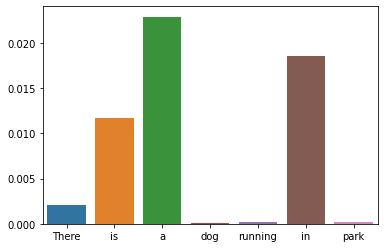

In [33]:
sentence = "There is a dog running in a park"
words = sentence.split(" ")
word_frequencies = [word_frequency(word, "en") for word in words]

sns.barplot(words, word_frequencies)
plt.show()

[Link to wordfreq](https://github.com/khuyentran1401/Python-data-science-code-snippet/blob/master/code_snippets/data_science_tools/wordfreq_example.py).

### newspaper3k: Extract Meaningful Information From an Articles in 2 Lines of Code

In [ ]:
!pip install newspaper3k nltk

If you want to quickly extract meaningful information from an article in a few lines of code, try newspaper3k. 

In [ ]:
from newspaper import Article
import nltk

nltk.download("punkt")

In [21]:
url = "https://mathdatasimplified.com/2023/05/08/build-an-efficient-data-pipeline-is-dbt-the-key/"
article = Article(url)
article.download()
article.parse()

In [22]:
article.title

'What is dbt (data build tool) and When should you use it?'

In [23]:
print(article.publish_date)

2023-05-08 00:00:00


In [24]:
article.top_image

'https://mathdatasimplified.com/wp-content/uploads/2023/05/dbt-pros-and-cons-6.png'

In [25]:
article.nlp()

In [26]:
print(article.summary)

One tool that has gained popularity in recent years for managing data pipelines is dbt (data build tool).
When Should You Consider dbtYou should consider using dbt when:You have a data warehouse: dbt is an effective tool for organizing, transforming, and testing data in a data warehouse environment.
Your data changes frequently: dbt’s snapshot allows you to track changes in data over time.
Other tools are needed for tasks such as data extraction, data cleansing, and data loading.
You want to visualize your data: dbt is not a data visualization tool.


In [27]:
article.keywords

['tool',
 'changes',
 'build',
 'dbt',
 'model',
 'documentation',
 'sql',
 'data',
 'select',
 'models',
 'property_type']

[Link to newspaper3k](https://github.com/codelucas/newspaper).



### Questgen.ai: Question Generator in Python

In [ ]:
!pip install git+https://github.com/ramsrigouthamg/Questgen.ai
!pip install git+https://github.com/boudinfl/pke.git

!python -m nltk.downloader universal_tagset
!python -m spacy download en 

In [ ]:
!wget https://github.com/explosion/sense2vec/releases/download/v1.0.0/s2v_reddit_2015_md.tar.gz
!tar -xvf  s2v_reddit_2015_md.tar.gz

It can be time-consuming to generate questions for a document. Wouldn't it be nice if you can automatically generate questions using Python? That is when `Questgen.ai` comes in handy. 

With a few lines of code, the questions for your document are automatically generated.

In [ ]:
from pprint import pprint
import nltk
nltk.download('stopwords')
from Questgen import main

In [21]:
payload = {
    "input_text": """The weather today was nice so I went for a walk. I stopped for a quick chat with my neighbor.
    It turned out that my neighbor just got a dog named Pepper. It is a black Labrador Retriever."""
}

<IPython.core.display.Javascript object>

With `Questgen.ai`, you can either generate boolean questions:

In [22]:
qe = main.BoolQGen()
output = qe.predict_boolq(payload)
pprint(output)

{'Boolean Questions': ['Is there a dog in my neighborhood?',
                       "Is pepper my neighbor's dog?",
                       'Is pepper the same as a labrador?'],
 'Count': 4,
 'Text': 'The weather today was nice so I went for a walk. I stopped for a '
         'quick chat with my neighbor.\n'
         '    It turned out that my neighbor just got a dog named Pepper. It '
         'is a black Labrador Retriever.'}


<IPython.core.display.Javascript object>

... or generate FAQ questions:

In [23]:
output = qg.predict_shortq(payload)
pprint(output)

Running model for generation
{'questions': [{'Question': 'What was the purpose of the stop?', 'Answer': 'chat', 'id': 1, 'context': 'I stopped for a quick chat with my neighbor.'}, {'Question': 'Who got a dog named Pepper?', 'Answer': 'neighbor', 'id': 2, 'context': 'It turned out that my neighbor just got a dog named Pepper. I stopped for a quick chat with my neighbor.'}]}
{'questions': [{'Answer': 'chat',
                'Question': 'What was the purpose of the stop?',
                'context': 'I stopped for a quick chat with my neighbor.',
                'id': 1},
               {'Answer': 'neighbor',
                'Question': 'Who got a dog named Pepper?',
                'context': 'It turned out that my neighbor just got a dog '
                           'named Pepper. I stopped for a quick chat with my '
                           'neighbor.',
                'id': 2}],
 'statement': 'The weather today was nice so I went for a walk. I stopped for '
              'a quick c

<IPython.core.display.Javascript object>

[Link to Questgen.ai](https://github.com/ramsrigouthamg/Questgen.ai).

### Word Ninja: Slice Your Lumped-Together Words

In [ ]:
!pip install wordninja 

If you want to slice your lumped-together words, use Word Ninja. You will be surprised how well it works. 

Below are some examples.

In [2]:
import wordninja 

wordninja.split("honeyinthejar")

['honey', 'in', 'the', 'jar']

In [3]:
wordninja.split("ihavetwoapples")

['i', 'have', 'two', 'apples']

In [4]:
wordninja.split("aratherblusterday")

['a', 'rather', 'bluster', 'day']

[Link to wordninja](https://github.com/keredson/wordninja).

### textstat: Calculate Statistics From Text

In [ ]:
!pip install textstat

If you want to get some important statistics from text such as readability score or reading time, use textstat. 

To get the readability score, use `automated_readability_index`. The ARI (Automated Readability Index) approximates the grade label needed to comprehend the text. If the ARI is 10.8 then the grade level needed to comprehend the text is 10th to 11th grade

In [4]:
import textstat 

<IPython.core.display.Javascript object>

In [7]:
text = "The working memory system is a form of conscious learning. But not all learning is conscious. Psychologists have long marveled at children’s ability to acquire perfect pronunciation in their first language or recognize faces."

<IPython.core.display.Javascript object>

In [8]:
textstat.automated_readability_index(text)

10.8

<IPython.core.display.Javascript object>

To measure the reading time in seconds, use `reading_time`. The reading time of the text above is 2.82s.

In [9]:
textstat.reading_time(text, ms_per_char=14.69)

2.82

<IPython.core.display.Javascript object>

[Link to textstat](https://github.com/shivam5992/textstat).

### RapidFuzz: Rapid String Matching in Python

In [ ]:
!pip install rapidfuzz

If you want to find strings that are similar to another string above a certain threshold, use RapidFuzz. RapidFuzz is a Python library that allows you to quickly match strings.

In [2]:
from rapidfuzz import fuzz

Calculates the normalized Indel distance between 2 strings

In [6]:
fuzz.ratio("Let's meet at 10 am tomorrow", "Let's meet at 10 am tommorrow")

98.24561403508771

In [5]:
fuzz.ratio("here you go", "you go here")

54.54545454545454

Sort the words in the strings and calculates the fuzz.ratio between them

In [4]:
fuzz.token_sort_ratio("here you go", "you go here")

100.0

[Link to RapidFuzz](https://github.com/maxbachmann/RapidFuzz).

### Checklist: Create Data to Test Your NLP Model

In [ ]:
!pip install checklist torch

It can be time-consuming to create data to test edge cases of your NLP model. If you want to quickly create data to test your NLP models, use Checklist. 

In the code below, I use Checklist's `Editor` to create multiple examples of negation in one line of code. 

In [18]:
import checklist
from checklist.editor import Editor

editor = Editor()
editor.template("{mask} is not {a:pos} option.", pos=["good", "cool"], nsamples=5).data

['that is not a good option.',
 'War is not a cool option.',
 'Windows is not a good option.',
 'Facebook is not a cool option.',
 'Sleep is not a cool option.']

In [15]:
editor.template("{mask} is not {a:neg} option.", neg=["bad", "awful"], nsamples=5).data

['There is not a bad option.',
 'Closure is not an awful option.',
 'TPP is not a bad option.',
 'Security is not an awful option.',
 'Change is not an awful option.']

[Link to Checklist](https://github.com/marcotcr/checklist).

### Top2Vec: Quick Topic Modeling in Python

In [ ]:
!pip install top2vec

If you want to quickly detect topics present in your text and generate jointly embedded topic, document, and word vectors, use Top2Vec. 

In the code below, I use Top2Vec to quickly find topics and create a wordcloud of words in the first 3 topics.

In [10]:
from top2vec import Top2Vec
from sklearn.datasets import fetch_openml

<IPython.core.display.Javascript object>

In [3]:
news = fetch_openml("Fake-News")

In [12]:
text = news.data["text"].to_list()

<IPython.core.display.Javascript object>

In [14]:
model = Top2Vec(documents=text, speed="learn", workers=8)

2022-05-25 08:35:13,293 - top2vec - INFO - Pre-processing documents for training
2022-05-25 08:35:22,285 - top2vec - INFO - Creating joint document/word embedding
2022-05-25 08:53:03,023 - top2vec - INFO - Creating lower dimension embedding of documents
2022-05-25 08:53:23,522 - top2vec - INFO - Finding dense areas of documents
2022-05-25 08:53:23,656 - top2vec - INFO - Finding topics


<IPython.core.display.Javascript object>

In [15]:
model.get_num_topics()

82

<IPython.core.display.Javascript object>

In [1]:
(
    a, 
    b
) = 1, 2

In [20]:
topic_words, word_scores, topic_nums = model.get_topics(3)

<IPython.core.display.Javascript object>

Returns:
- topic_words: For each topic the top 50 words are returned, in order of semantic similarity to topic.

- word_scores: For each topic the cosine similarity scores of the top 50 words to the topic are returned.

- topic_nums: The unique index of every topic will be returned.

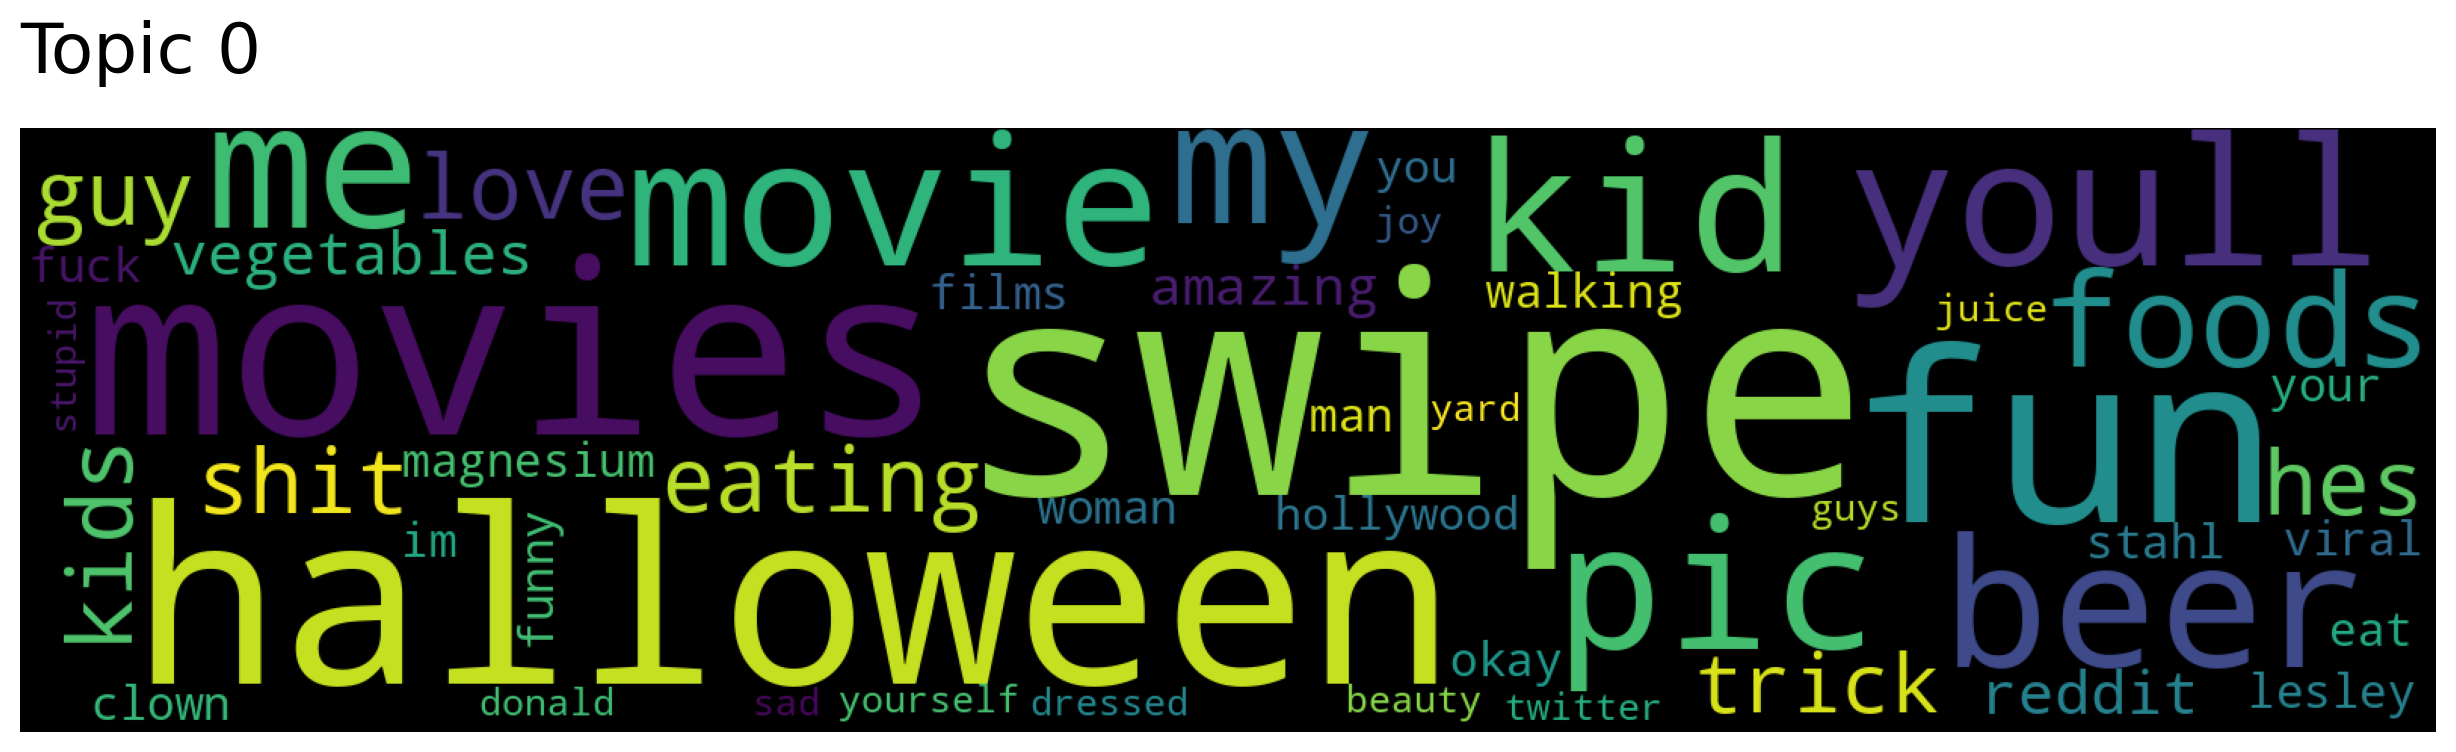

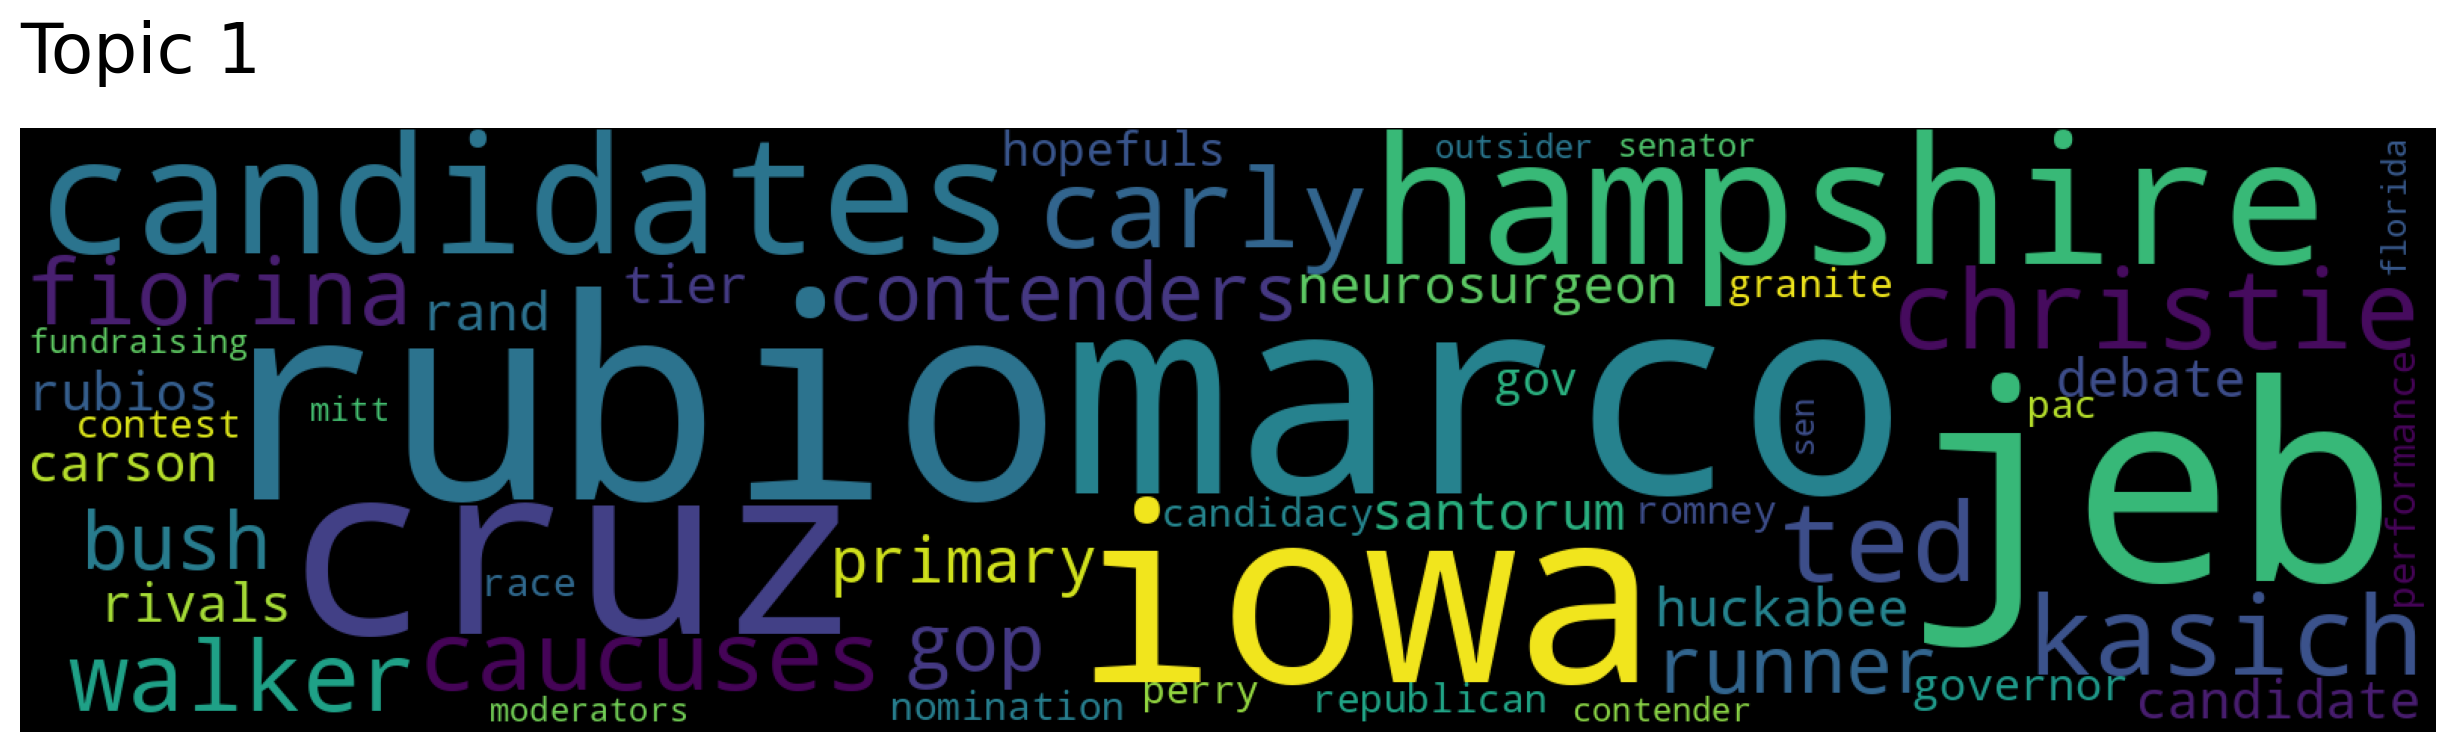

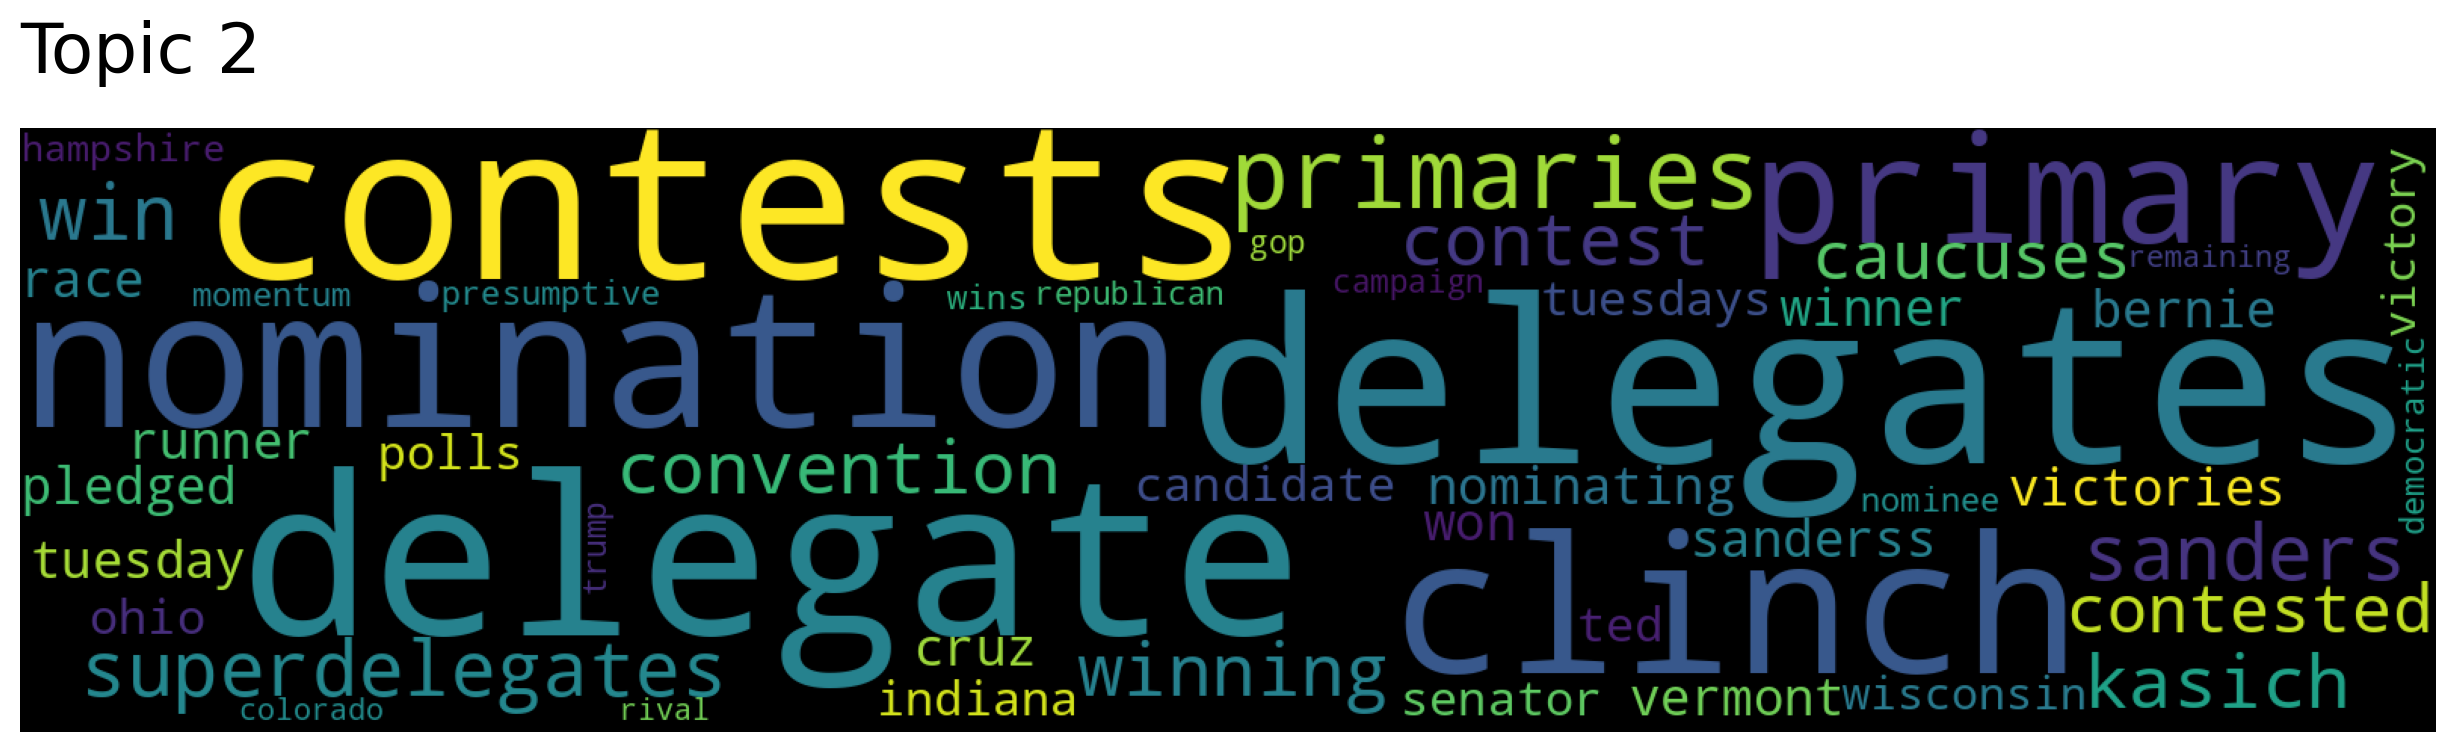

<IPython.core.display.Javascript object>

In [21]:
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)

[Link to Top2Vec](https://github.com/ddangelov/Top2Vec).

### Expanding English Contractions in Text

In [ ]:
!pip install contractions

Contraction can cause issues when processing text. If you want to expand contractions using Python, use the library contractions

In [3]:
import contractions

sent = "I'm not sure, but I'd like to do it"

contractions.fix(sent)

'I am not sure, but I would like to do it'

### inflect: Generate Plurals, Singulars, and Indefinite Articles

In [ ]:
!pip install inflect 

If you want to generate plurals, singulars, or indefinite articles from given words, use inflect. 

In [2]:
import inflect

p = inflect.engine()

In [3]:
p.plural_noun('he')

'they'

In [7]:
p.plural_verb('sees')

'see'

In [20]:
p.gender("feminine")
p.singular_noun("they")

'she'

In [12]:
if p.compare_verbs('sees', 'see'):
    print("same word")

same word


In [10]:
# Add the correct "a" or "an" for a given word
fruit1 = 'apple'
fruit2 = 'banana'
print(f"I got you {p.a(fruit1)} "
      f"and {p.a(fruit2)}")

I got you an apple and a banana


[Link to inflect](https://github.com/jaraco/inflect).

### FlashText: Extract and Replace Keywords in Sentences

In [ ]:
!pip install flashtext

Have you ever wanted to extract similar keywords and turn them into one standard keyword? If so, try FlashText. 

FlashText allows you to extract or replace keywords in sentences. 

In the code below, we use FlashText to extract the keywords `CEO` and `Python programming language` from a sentence that contains only the keywords `ceo` and `Python`.

In [10]:
from flashtext import KeywordProcessor

kw_processor = KeywordProcessor()
kw_dict = {
    "CEO": ["Chief Executive Officer", "ceo"], # Similar keywords to CEO
    "Python programming language": ["Python", "Python language"]
}
kw_processor.add_keywords_from_dict(keyword_dict=kw_dict)

sent = "The ceo of this company is fluent in Python."
kw_processor.extract_keywords(sent)

['CEO', 'Python programming language']

[Link to FlashText](https://github.com/vi3k6i5/flashtext).

### ekphrasis: Text Processing Tool For Social Media Text

In [ ]:
!pip install ekphrasis==0.5.4

It is challenging to process text from social media such as Twitter or Facebook. ekphrasis allows you to incorporate social tokenizers, word segmentation, spell correction, and more into a pipeline to process those texts. 

In [20]:
from ekphrasis.classes.preprocessor import TextPreProcessor
from ekphrasis.classes.tokenizer import SocialTokenizer
from ekphrasis.dicts.emoticons import emoticons

text_processor = TextPreProcessor(
    # terms that will be normalized
    normalize=['url', 'user'],
    # terms that will be annotated
    annotate={"hashtag", "allcaps", "elongated", "repeated",
        'emphasis', 'censored'},
    
    # corpus for word segmentation 
    segmenter="twitter", 
    
    unpack_hashtags=True,  # perform word segmentation on hashtags
    unpack_contractions=True,  # Unpack contractions (can't -> can not)
    spell_correct_elong=False,  # spell correction for elongated words

    tokenizer=SocialTokenizer(lowercase=True).tokenize,
    
    # Replace emojis with words
    dicts=[emoticons]
)

sent = "@coolyazzy94 I'm learning to retweeeet!! Least it sucks LESS than Facebook haha :P #learn-twitter https://t.co/7RdyMCVPKx"

print(" ".join(text_processor.pre_process_doc(sent)))

Reading twitter - 1grams ...
Reading twitter - 2grams ...
Reading english - 1grams ...
<user> i am learning to retweet <elongated> ! <repeated> least it sucks <allcaps> less </allcaps> than facebook haha <tong> <hashtag> learn twitter </hashtag> <url>


[Link to ekphrasis](https://github.com/cbaziotis/ekphrasis).

### Chroma: The Lightning-Fast Solution to Text Embeddings and Querying

In [ ]:
!pip install chromadb

Semantic search uses embedding to understand the meaning of search queries instead of relying solely on keyword matches to locate documents.

Embedding is like a translator converting words into numbers so that computers can understand. Chroma makes it easy to create embeddings from documents and find similar results with a few lines of code.

In the code below, the documents with IDs 1 and 2 closely match the given query text.


In [1]:
import chromadb

client = chromadb.Client()

collection = client.get_or_create_collection("test")

collection.add(
    documents=[
        "A man is eating food.",
        "A man is eating yellow noodles.",
        "The girl is carrying a baby.",
        "A man is riding a horse.",
    ],
    ids=["1", "2", "3", "4"],
)

query_result = collection.query(
    query_texts=["A man is eating pasta." ],
    n_results=2
)

print(query_result)


{'ids': [['2', '1']], 'distances': [[0.5690374970436096, 0.5929027199745178]], 'metadatas': [[{}, {}]], 'embeddings': None, 'documents': [['A man is eating yellow noodles.', 'A man is eating food.']]}


[Link to Chroma](https://github.com/chroma-core/chroma).